In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import functools as ft

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
# read table for Timeline Followback (TFB) data, which are the self reported drug use surveys

s = pd.read_csv('/Users/danherman/Desktop/oud_treatment_outcome/data/raw_data_files/T_FRTFB.csv')

# show shape and head
display(s.shape)
s[:5]

(100518, 56)

,PATIENTNUMBER,SITE,VISIT,PATIENTID,VISITID,TFB002A,TFB002A_UNIT,TFB002A_NORM,TFB002B,TFB003A,TFB003A_UNIT,TFB003A_NORM,VISITDT,VISITDT_DT,TFB001,TFB001A,TFB001A_UNIT,TFB001A_NORM,TFB001B,TFB001C,TFB011A,TFB011A_UNIT,TFB011A_NORM,TFB011B,TFB011C,TFB010A,TFB010A_UNIT,TFB010A_NORM,TFB010B,TFB009A,TFB009A_UNIT,TFB009A_NORM,TFB009B,TFB004A,TFB004A_UNIT,TFB004A_NORM,TFB004B,TFB005A,TFB005A_UNIT,TFB005A_NORM,TFB005B,TFB006A,TFB006A_UNIT,TFB006A_NORM,TFB006B,TFB007A,TFB007A_UNIT,TFB007A_NORM,TFB007B,TFB008A,TFB008A_UNIT,TFB008A_NORM,TFB008B,TFB003B,TFB001_dt,patdeid
0,NaN,NaN,BASELINE,NaN,15031,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,1.0,NaN,1.0,5.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,-31.0,1
1,NaN,NaN,BASELINE,NaN,15031,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,1.0,NaN,1.0,5.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,-32.0,1
2,NaN,NaN,BASELINE,NaN,15031,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,1.0,NaN,1.0,5.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,-30.0,1
3,NaN,NaN,BASELINE,NaN,15031,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,1.0,NaN,1.0,5.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,-29.0,1
4,NaN,NaN,BASELINE,NaN,15031,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,1.0,NaN,1.0,5.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,-28.0,1


In [3]:
# drop columns whose data is not being analyzed for this project

s = s.drop(columns=[col for col in s.columns if col not in ['VISIT','TFB002A','TFB003A'	'TFB001A','TFB001B','TFB011A','TFB010A','TFB009A','TFB004A','TFB005A','TFB006A','TFB007A','TFB008A','patdeid']])

In [4]:
# eyeball columns to see what's left

display(s.shape)
s[:5]

(100518, 12)

,VISIT,TFB002A,TFB001B,TFB011A,TFB010A,TFB009A,TFB004A,TFB005A,TFB006A,TFB007A,TFB008A,patdeid
0,BASELINE,0.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
1,BASELINE,0.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
2,BASELINE,0.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
3,BASELINE,0.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
4,BASELINE,0.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1


In [5]:
# rename columns according to documentation for interpretability

new_columns = {'TFB001B':'alc_qty','TFB002A':'sru_cannabis','TFB003A':'sru_cocaine','TFB001A':'sru_alcohol','TFB011A':'sru_other','TFB010A':'sru_oxycodone','TFB009A':'sru_methadone','TFB004A':'sru_amphetamine','TFB005A':'sru_methamphetamine','TFB006A':'sru_opiates','TFB007A':'sru_benzodiazepines','TFB008A':'sru_propoxyphene'}


In [6]:
# renaming columns

s = s.rename(columns=new_columns)

s[:5]

,VISIT,sru_cannabis,alc_qty,sru_other,sru_oxycodone,sru_methadone,sru_amphetamine,sru_methamphetamine,sru_opiates,sru_benzodiazepines,sru_propoxyphene,patdeid
0,BASELINE,0.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
1,BASELINE,0.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
2,BASELINE,0.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
3,BASELINE,0.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
4,BASELINE,0.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1


In [7]:
# reorder index for easier interpretation

s = s.reindex(columns=['patdeid','VISIT','sru_alcohol','alc_qty','sru_cannabis','sru_cocaine','sru_amphetamine','sru_methamphetamine','sru_opiates','sru_benzodiazepines','sru_propoxyphene','sru_methadone','sru_oxycodone','sru_other'])

s[:5]

,patdeid,VISIT,sru_alcohol,alc_qty,sru_cannabis,sru_cocaine,sru_amphetamine,sru_methamphetamine,sru_opiates,sru_benzodiazepines,sru_propoxyphene,sru_methadone,sru_oxycodone,sru_other
0,1,BASELINE,NaN,NaN,0.0,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1,BASELINE,NaN,NaN,0.0,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1,BASELINE,NaN,NaN,0.0,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1,BASELINE,NaN,NaN,0.0,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1,BASELINE,NaN,NaN,0.0,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# remove 'WK' from VISIT column to preserve int for ordinal value in sequencing time
s.VISIT = s.VISIT.str.replace('WK','')

# replace BASELINE with 0 and change dtype to int
s.VISIT.replace('BASELINE','0', inplace=True)

# convert column data type to int65
s.VISIT.astype(np.int64)

# show first 5 rows
s[:5]

,patdeid,VISIT,sru_alcohol,alc_qty,sru_cannabis,sru_cocaine,sru_amphetamine,sru_methamphetamine,sru_opiates,sru_benzodiazepines,sru_propoxyphene,sru_methadone,sru_oxycodone,sru_other
0,1,0,NaN,NaN,0.0,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1,0,NaN,NaN,0.0,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1,0,NaN,NaN,0.0,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1,0,NaN,NaN,0.0,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1,0,NaN,NaN,0.0,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [9]:
# display value counts for features other than first column, the display again with normalize=True parameter to see percentages

for col in s.columns:
    if col != 'patdeid':
        print(s[col].value_counts())
        print('----------------------')
        print(s[col].value_counts(normalize=True))
        print('----------------------')
        print('----------------------')

VISIT
0     47412
4     12150
24     7764
32     7436
8      7379
12     7040
16     5979
20     5358
Name: count, dtype: int64
----------------------
VISIT
0     0.471677
4     0.120874
24    0.077240
32    0.073977
8     0.073410
12    0.070037
16    0.059482
20    0.053304
Name: proportion, dtype: float64
----------------------
----------------------
Series([], Name: count, dtype: int64)
----------------------
Series([], Name: proportion, dtype: float64)
----------------------
----------------------
alc_qty
2 beers                                               804
1 beer                                                783
4 drinks                                              599
2 drinks                                              396
3 beers                                               369
3 drinks                                              249
2 drinks (2 beers)                                    222
2 Beers                                               177
1 drink (1 beer)    

## Notes from feature analysis
patdeid - Looks fine<br>
VISIT - change data type to np.datetime64<br>
sru_alchol - Looks fine<br>
alc_qty - Txt column - inspect further<br>
sru_cannabis - Looks fine<br>
sru_cocaine - Looks fine<br>
sru_amphetamine - Looks fine<br>
sru_methamphetamine - Looks fine<br>
sru_opiates - Looks fine<br>
sru_benzodiazepines - Looks fine<br>
sru_propoxyphene - Only 41 positive tests, data is trivial, column to be dropped<br>
sru_methadone - Looks fine<br>
sru_oxycodone - Looks fine<br>
sru_other - Looks fine<br>






In [10]:
# change dtype for VISIT to np.int64
s.VISIT = s.VISIT.astype(np.int64)


In [11]:
# drop alc_qty column
s.drop(columns='alc_qty', inplace=True)

In [12]:
# inspect and replace nulls
s.isnull().sum()


patdeid                     0
VISIT                       0
sru_alcohol            100518
sru_cannabis              239
sru_cocaine            100518
sru_amphetamine           239
sru_methamphetamine       239
sru_opiates               239
sru_benzodiazepines       239
sru_propoxyphene          239
sru_methadone             239
sru_oxycodone             239
sru_other                 239
dtype: int64

In [13]:
s['total_visits'] = s.groupby('patdeid')['VISIT'].transform('nunique')

In [14]:
treatment_retention = s.groupby('patdeid').agg({'total_visits':'first'}).reset_index()

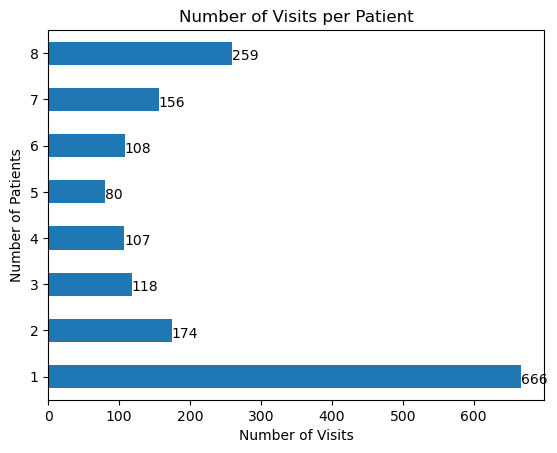

In [15]:
ax = treatment_retention.total_visits.value_counts().sort_index(ascending=True).plot(kind='barh')
ax.set_xlabel('Number of Visits')
ax.set_ylabel('Number of Patients')
ax.set_title('Number of Visits per Patient')
# show count as label on bar in chart
for i in ax.patches:
    ax.text(i.get_width()+.1, i.get_y()+.1, str(round((i.get_width()), 2)), fontsize=10, color='black')

In [16]:
treatment_retention.rename(columns={'total_visits':'weeks_reported'}, inplace=True)

In [17]:
treatment_retention.weeks_reported.value_counts().sort_index(ascending=False)

weeks_reported
8    259
7    156
6    108
5     80
4    107
3    118
2    174
1    666
Name: count, dtype: int64

In [18]:
agg_dict = {col:'sum' for col in s.columns if col not in ['patdeid','VISIT','total_visits']}

In [19]:
agg_dict

{'sru_alcohol': 'sum',
 'sru_cannabis': 'sum',
 'sru_cocaine': 'sum',
 'sru_amphetamine': 'sum',
 'sru_methamphetamine': 'sum',
 'sru_opiates': 'sum',
 'sru_benzodiazepines': 'sum',
 'sru_propoxyphene': 'sum',
 'sru_methadone': 'sum',
 'sru_oxycodone': 'sum',
 'sru_other': 'sum'}

In [20]:
s = s.groupby(['patdeid','VISIT']).agg(agg_dict).reset_index()

In [21]:
s[:5]

,patdeid,VISIT,sru_alcohol,sru_cannabis,sru_cocaine,sru_amphetamine,sru_methamphetamine,sru_opiates,sru_benzodiazepines,sru_propoxyphene,sru_methadone,sru_oxycodone,sru_other
0,1,0,0.0,0.0,0.0,0.0,0.0,30.0,0.0,0.0,0.0,0.0,0.0
1,1,4,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,8,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2,0,0.0,0.0,0.0,0.0,0.0,30.0,0.0,0.0,0.0,0.0,0.0
4,2,4,0.0,1.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0


In [22]:
# create a new dataframe for every filter of visit column
# the name of the dataframe with be VISIT+number of visit
for i in s['VISIT'].unique():
    globals()['VISIT%s' % i] = s[s['VISIT']==i]

# print shape and name of ea dataframe next to eachother
for i in range(0,28,4):
    print(globals()['VISIT%s' % i].shape, 'VISIT%s' % i)

(1666, 13) VISIT0
(854, 13) VISIT4
(678, 13) VISIT8
(634, 13) VISIT12
(564, 13) VISIT16
(526, 13) VISIT20
(650, 13) VISIT24


In [23]:
# for each dataframe beteween VISIT0 and VISIT24
# add the value in VISIT to the end of the name of each column +"_"+"visit"
# do not change the patdeid column
for i in range(0,28,4):
    for col in globals()['VISIT%s' % i].columns:
        if col != 'patdeid':
            globals()['VISIT%s' % i][col+'_'+str(i)] = globals()['VISIT%s' % i][col]
            globals()['VISIT%s' % i] = globals()['VISIT%s' % i].drop(columns=col)

# merge all dfs using left merge on patdeid
for i in range(0,24,4):
    if i == 0:
        df = pd.merge(globals()['VISIT%s' % i], globals()['VISIT%s' % (i+4)], on='patdeid', how='left')
    elif i < 24:
        df = pd.merge(df, globals()['VISIT%s' % (i+4)], on='patdeid', how='left')
    else:
        pass

# drop eroneous VISIT columns, as they are encoded into feature columns
df = df.drop(columns=[col for col in df.columns if col.startswith('VISIT')])

# check shape and first 5 rows
display(df.shape)
df[:5]

(1666, 78)

,patdeid,sru_alcohol_0,sru_cannabis_0,sru_cocaine_0,sru_amphetamine_0,sru_methamphetamine_0,sru_opiates_0,sru_benzodiazepines_0,sru_propoxyphene_0,sru_methadone_0,sru_oxycodone_0,sru_other_0,sru_alcohol_4,sru_cannabis_4,sru_cocaine_4,sru_amphetamine_4,sru_methamphetamine_4,sru_opiates_4,sru_benzodiazepines_4,sru_propoxyphene_4,sru_methadone_4,sru_oxycodone_4,sru_other_4,sru_alcohol_8,sru_cannabis_8,sru_cocaine_8,sru_amphetamine_8,sru_methamphetamine_8,sru_opiates_8,sru_benzodiazepines_8,sru_propoxyphene_8,sru_methadone_8,sru_oxycodone_8,sru_other_8,sru_alcohol_12,sru_cannabis_12,sru_cocaine_12,sru_amphetamine_12,sru_methamphetamine_12,sru_opiates_12,sru_benzodiazepines_12,sru_propoxyphene_12,sru_methadone_12,sru_oxycodone_12,sru_other_12,sru_alcohol_16,sru_cannabis_16,sru_cocaine_16,sru_amphetamine_16,sru_methamphetamine_16,sru_opiates_16,sru_benzodiazepines_16,sru_propoxyphene_16,sru_methadone_16,sru_oxycodone_16,sru_other_16,sru_alcohol_20,sru_cannabis_20,sru_cocaine_20,sru_amphetamine_20,sru_methamphetamine_20,sru_opiates_20,sru_benzodiazepines_20,sru_propoxyphene_20,sru_methadone_20,sru_oxycodone_20,sru_other_20,sru_alcohol_24,sru_cannabis_24,sru_cocaine_24,sru_amphetamine_24,sru_methamphetamine_24,sru_opiates_24,sru_benzodiazepines_24,sru_propoxyphene_24,sru_methadone_24,sru_oxycodone_24,sru_other_24
0,1,0.0,0.0,0.0,0.0,0.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,0.0,0.0,0.0,0.0,0.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
2,3,0.0,0.0,0.0,0.0,0.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.0,1.0,0.0,0.0,0.0,0.0
3,4,0.0,1.0,0.0,0.0,0.0,30.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,8.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,6,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,25.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
df.to_csv('/Users/danherman/Desktop/oud_treatment_outcome/data/clean_data/feature_engineering_data/self_reported_use.csv')